# Exploratory Data Analysis: Dwelling Permit Data

## Preliminaries

In [16]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import matplotlib.ticker as ticker

# Important functionality for this notebook
from scipy import stats
import statsmodels.api as sm
import os

In [4]:
# Set directory
os.chdir("C:/Users/emshe/Desktop/BRAINSTATION/CAPSTONE/GIT_REPO/DATA/PERMITS")

In [6]:
# Load clean data
df = pd.read_csv('issued_building_permits_filter_dwelling_purposes_cleaned.csv')

## Helper Functions

In [10]:
# Define function to generate correlation heatmap
def gen_corr_heatmap(df):
    num_df = df.select_dtypes(include = 'number') #restrict to numeric columns
    corr_matrix = num_df.corr() # compute correlation matrix
    fig = px.imshow(
        corr_matrix,
        text_auto=True, #include text
        color_continuous_scale='RdBu', #set color scale
        aspect='auto', #set aspect ratio
        title='Correlation Heatmap of Numeric Columns'
    ) # generate heatmap figure
    fig.update_layout(title={'x': 0.5})
    fig.show()

In [14]:
# Examine sample data
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25508 entries, 0 to 25507
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PermitNumber             25508 non-null  object 
 1   PermitNumberCreatedDate  25508 non-null  object 
 2   IssueDate                25508 non-null  object 
 3   PermitElapsedDays        25508 non-null  int64  
 4   ProjectValue             25508 non-null  float64
 5   TypeOfWork               25508 non-null  object 
 6   Address                  25508 non-null  object 
 7   ProjectDescription       25508 non-null  object 
 8   PermitCategory           25508 non-null  object 
 9   Applicant                25508 non-null  object 
 10  PropertyUse              25508 non-null  object 
 11  SpecificUseCategory      25508 non-null  object 
 12  BuildingContractor       25508 non-null  object 
 13  GeoLocalArea             25508 non-null  object 
 14  Geom                  

,PermitNumber,PermitNumberCreatedDate,IssueDate,PermitElapsedDays,ProjectValue,TypeOfWork,Address,ProjectDescription,PermitCategory,Applicant,PropertyUse,SpecificUseCategory,BuildingContractor,GeoLocalArea,Geom,geo_point_2d
6704,DB-2018-00905,2018-02-20,2018-07-12,142,770947.5,New Building,"2285 CHARLES STREET, Vancouver, BC V5L 2V4",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,Akash Sidhu,Dwelling Uses,Duplex,Anmol Holding Ltd,Grandview-Woodland,"{""coordinates"":[-123.0582902,49.2732086],""type...","49.2732086, -123.0582902"
724,BP-2017-00314,2017-01-19,2017-03-06,46,10000.0,Addition / Alteration,"1720 W 12TH AVENUE #301, Vancouver, BC V6J 2E6",Field Review - Addition / Alteration - #301\nI...,Renovation - Residential - Lower Complexity,Michael Lu DBA: DWG Design Work Group Ltd.,Dwelling Uses,Multiple Dwelling,unknown,Fairview,"{""coordinates"":[-123.1441644,49.260581],""type""...","49.260581, -123.1441644"
9954,DB-2017-04905,2017-09-19,2017-10-12,23,34000.0,Addition / Alteration,"3085 E 20TH AVENUE, Vancouver, BC V5M 2V3",Field Review - Addition / Alteration - Exterio...,Renovation - Residential - Lower Complexity,Vikram Verma,Dwelling Uses,Single Detached House w/Sec Suite,unknown,Renfrew-Collingwood,"{""coordinates"":[-123.0395453,49.2525726],""type...","49.2525726, -123.0395453"
21396,DB-2022-03043,2022-06-13,2023-04-22,313,2317250.0,New Building,"3115 SW MARINE DRIVE, Vancouver, BC V6N 3Y4",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,Matthew Madden,Dwelling Uses,Single Detached House,City Wide Building Inc,Kerrisdale,"{""coordinates"":[-123.1748125,49.2289703],""type...","49.2289703, -123.1748125"
11377,BP-2021-00952,2021-03-16,2021-05-27,72,25000.0,Addition / Alteration,"1009 EXPO BOULEVARD, Vancouver, BC V6Z 2V9",Field Review - Addition / Alteration - #603 - ...,Renovation - Residential - Lower Complexity,Harbour Landing Construction Ltd,Dwelling Uses,Multiple Dwelling,Harbour Landing Construction Ltd,Downtown,"{""coordinates"":[-123.1177475,49.275191],""type""...","49.275191, -123.1177475"


In [12]:
# Describe dataframe
df.describe()

,PermitElapsedDays,ProjectValue
count,25508.000000,2.550800e+04
mean,176.230947,8.150578e+05
std,156.563300,8.608308e+06
min,0.000000,1.000000e+00
25%,61.000000,1.500000e+04
50%,146.000000,9.198750e+04
75%,241.000000,4.800000e+05
max,2367.000000,8.071855e+08


## Comparing Project Value to Categorical Variables

In [18]:
df['GeoLocalArea'].value_counts()

GeoLocalArea
Kensington-Cedar Cottage    2383
Hastings-Sunrise            1949
Renfrew-Collingwood         1896
Sunset                      1748
Dunbar-Southlands           1617
Kitsilano                   1523
Riley Park                  1475
Victoria-Fraserview         1452
West End                    1394
Downtown                    1223
Killarney                   1033
West Point Grey              960
Grandview-Woodland           957
Marpole                      881
Fairview                     794
Kerrisdale                   773
Arbutus Ridge                769
Mount Pleasant               729
Oakridge                     653
Shaughnessy                  607
South Cambie                 449
Strathcona                   243
Name: count, dtype: int64

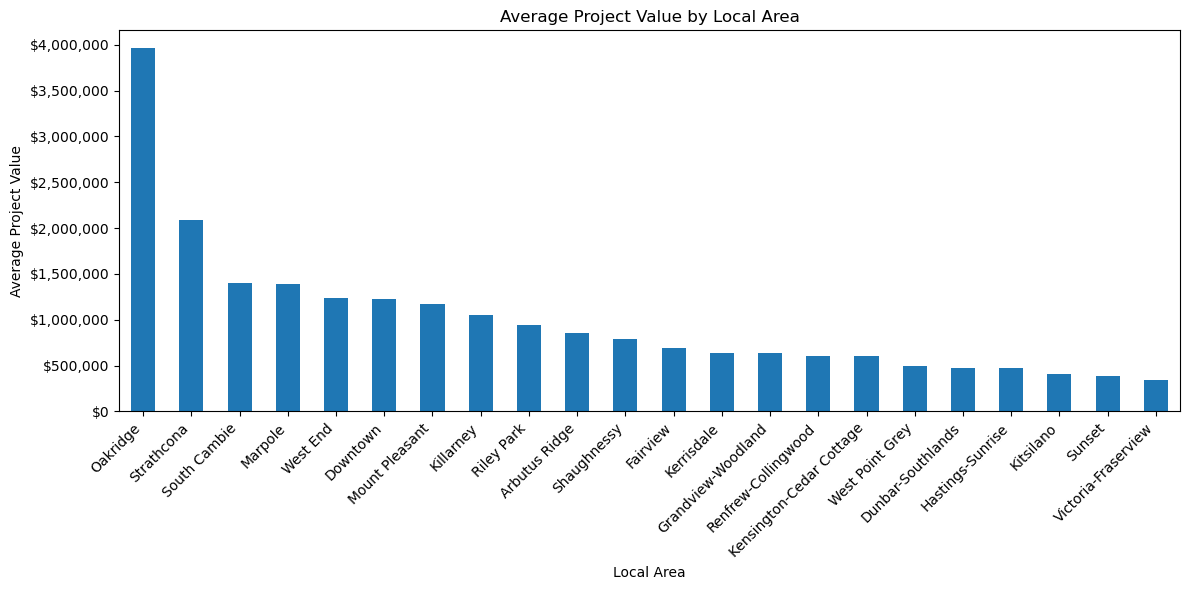

In [17]:
# Group by GeoLocalArea and calculate average ProjectValue
avg_project_value = df.groupby('GeoLocalArea')['ProjectValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_project_value.plot(kind='bar')

plt.title('Average Project Value by Local Area')
plt.xlabel('Local Area')
plt.ylabel('Average Project Value')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

## Miscellaneous